# Twitter Bot Detection Project - CS ML363M

**The Problem At Hand - Detecting Bots on X (formerly known as Twitter)**

Welcome! This project focuses on the world of machine learning and social media. Bots have become a significant part of social media platforms, often influencing public opinion, spreading misinformation, or even affecting stock markets. Our challenge is to build a model that can sift through a dataset of Twitter data and accurately identify, based on their Tweets, which accounts are bots.

**Why does this problem matter?**

In the realm of X (formally known as Twitter), where opinions are formed and shared at lightning speed, distinguishing between genuine human interactions and those orchestrated by bots is crucial. Bots can skew the perception of public opinion, amplify certain messages disproportionately, and even sway political discussions. By developing a reliable model to detect bots, we can contribute to a more authentic and reliable social media environment.

<img src="https://images.sparktoro.com/blog/wp-content/uploads/2018/10/fake-follower-politicians1.jpg" width="500" height="auto">

<img src="https://www.pewresearch.org/wp-content/uploads/2018/04/FT_18.04.09_twitterBots_featured.png?resize=260" width="500" height="auto">

By predicting bot behavior, we can preemptively address the challenges they pose, ensuring a healthier social media landscape. Social media platforms can maintain the integrity of genuine user interactions, researchers can analyze social trends without bot interference, and businesses can ensure they are targeting real potential customers.

**Our Dataset**

We will be using a 'Twitter Human/Bots Dataset', a collection of Twitter user profiles and their account data. This dataset is provided by Kaggle, with features like user IDs, usernames, descriptions, verified, follower counts, and more. Each user in this dataset is labeled either as a bot or a human, serving as our ground truth for training and testing our models. With this dataset, we're not just analyzing numbers and texts; we're unraveling patterns that distinguish human behavior from artificial ones.

Dataset: https://www.kaggle.com/code/davidmartngutirrez/bots-accounts-eda/input

In [ ]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('twitter_human_bots_dataset.csv')

# Get the number of rows
num_rows = df.shape[0]

# Print the number of rows
print(f'Number of rows: {num_rows}')

column_names = df.columns
print("Column names:", column_names)
bots_data = df[df['account_type'] == "bot"]
non_bots_data = df[df['account_type'] == "human"]

Number of rows: 37438
Column names: Index(['Unnamed: 0', 'created_at', 'default_profile', 'default_profile_image',
       'description', 'favourites_count', 'followers_count', 'friends_count',
       'geo_enabled', 'id', 'lang', 'location', 'profile_background_image_url',
       'profile_image_url', 'screen_name', 'statuses_count', 'verified',
       'average_tweets_per_day', 'account_age_days', 'account_type'],
      dtype='object')


##Attributes

The basic, inital dataset contains the 20 following attributes:

- **index**: simply the index of the entry in the dataset.
- **created_at**: Date when the account was created.
- **default_profile**: Boolean indicating whether the account has a default profile.
- **default_image_profile**: Boolean indicating whether the account has a default image profile.
- **description**: User account description.
- **favorites_count**: Total number of favourited tweets.
- **followers_count**: Total number of followers.
- **friends_count**: Total number of friends.
- **geo_enabled**: Boolean indicating whether the account has the geographic location enabled.
- **id**: Unique identifier of the account.
- **lang**: Language of the account.
- **location**: Location of the account.
- **profile_background_url**: Profile background image url.
- **profile_image_url**: Profile image url.
- **statuses_count**: Total number of tweets.
- **verified**: Boolean indicating whether the account has been verified.
- **average_tweets_per_day**: Average tweets posted per day.
- **account_age_days**: Account age measured in days.
- **account_type**: Account type with two unique values: bot or human.

## Data Inspecting and Cleaning

Our dataset is decently clean. Most of the features don't have missing values, or are set to default values. Let's check the features that need to be cleaned:

In [ ]:
print(df.isna().sum())

Unnamed: 0                         0
created_at                         0
default_profile                    0
default_profile_image              0
description                     7256
favourites_count                   0
followers_count                    0
friends_count                      0
geo_enabled                        0
id                                 0
lang                            7957
location                           3
profile_background_image_url    4499
profile_image_url                  1
screen_name                        0
statuses_count                     0
verified                           0
average_tweets_per_day             0
account_age_days                   0
account_type                       0
dtype: int64


Looks like there's 5 features that have null values: `description`, `lang`, `location`, `profile_background_image_url`, and `profile_image_url`.

When we explore the `description` feature later in a separate section, we'll see that there's no need to actually clean this field - an empty description will have 0 characters, 0 words, and won't contain a 'bot' keyword.

As for the `lang` feature, let's set the default value to 'en' - English. This will be important later when we explore the `descriptions` feature further.

In [ ]:
df['lang'].fillna('en', inplace=True)
print("Number of missing values in 'lang' after filling: ", df['lang'].isna().sum())

Number of missing values in 'lang' after filling:  0


**For** the `location ` feature, we can set the default value to "unknown."

In [ ]:
df['location'].fillna('unknown', inplace=True)

For the `profile_background_image_url` and `profile_image_url` features, we are setting the fields to 'unknown', as we do not know if the images do not have a valid URL or the null values comes as an error of the dataset. We choose not to set them to the default image URLs, because this might misrepresent our data.

In [ ]:
df['profile_background_image_url'].fillna('unknown', inplace=True)
print("Number of missing profile background image urls: ", df['profile_background_image_url'].isna().sum())
df['profile_image_url'].fillna('unknown', inplace=True)
print("Number of missing profile image urls: ", df['profile_background_image_url'].isna().sum())


Number of missing profile background image urls:  0
Number of missing profile image urls:  0


In [ ]:
print(df.isna().sum())

Unnamed: 0                         0
created_at                         0
default_profile                    0
default_profile_image              0
description                     7256
favourites_count                   0
followers_count                    0
friends_count                      0
geo_enabled                        0
id                                 0
lang                               0
location                           0
profile_background_image_url       0
profile_image_url                  0
screen_name                        0
statuses_count                     0
verified                           0
average_tweets_per_day             0
account_age_days                   0
account_type                       0
dtype: int64


Great! Our data is now cleaned up for the features necessary. Let's move on to data exploration and feature engineering.

# Feature Engineering and Exploration

###Exploring and Engineering the 'Descriptions' Attribute

The 'description' column contains a string of text, representing the user's description or bio on Twitter. We can explore this specific in quite a lot of depth, from simple word or character counts, to language processing and even identifying the most common words or phrases.

Let's start with **text length analysis**. Measuring the length of the description could provide insights. For example, bots might have shorter or more uniform description lengths.

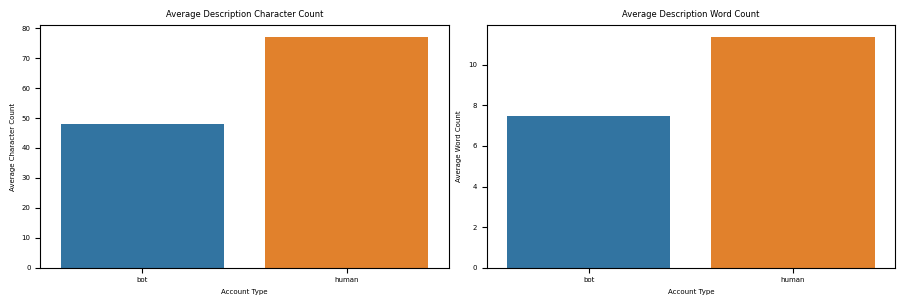

,description_length,word_count
account_type,,
bot,48.040241,7.463260
human,77.106065,11.376724


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# calculate character and word count for each description
df['description_length'] = df['description'].astype(str).apply(len)
df['word_count'] = df['description'].astype(str).apply(lambda x: len(x.split()))

# group by account type (human/bot) and calculate average description length/word count
description_stats = df.groupby('account_type')[['description_length', 'word_count']].mean()

# plot results
plt.figure(figsize=(9, 3))

plt.subplot(1, 2, 1)
sns.barplot(x=description_stats.index, y=description_stats['description_length'])
plt.title('Average Description Character Count')
plt.xlabel('Account Type')
plt.ylabel('Average Character Count')

plt.subplot(1, 2, 2)
sns.barplot(x=description_stats.index, y=description_stats['word_count'])
plt.title('Average Description Word Count')
plt.xlabel('Account Type')
plt.ylabel('Average Word Count')

plt.tight_layout()
plt.show()

description_stats

The visualizations and statistics provide a clear comparison between bot and human Twitter accounts in terms of their description lengths. Bot accounts seem to have a lower number of words and characters in their descriptions on average.

**Average Description Character Count:** Bot accounts have an average of approximately 48 characters in their descriptions, while human accounts average around 77 characters.

**Average Description Word Count:** Bot accounts average about 7.5 words in their descriptions, whereas human accounts average about 11.4 words.

Next, let's move onto exploring the prescence of **URLs and hashtags** in the description.

In [ ]:
import re
# regular expressions for URLs and hashtags
url_regex = r'https?://\S+'
hashtag_regex = r'#\S+'

# apply regex and check presence
def contains_pattern(description, pattern):
    if pd.isna(description):
        return False
    return bool(re.search(pattern, description))

# applying the functions to the dataframe
df['contains_url'] = df['description'].apply(contains_pattern, pattern=url_regex)
df['contains_hashtag'] = df['description'].apply(contains_pattern, pattern=hashtag_regex)

# grouping data by account type and calculating proportions
url_hashtag_stats = df.groupby('account_type')[['contains_url', 'contains_hashtag']].mean()
url_hashtag_stats

,contains_url,contains_hashtag
account_type,,
bot,0.147847,0.054245
human,0.091313,0.154360


The analysis reveals interesting insights into the usage of URLs and hashtags in the descriptions of Twitter accounts, differentiated by account type.

These findings indicate that human accounts are more likely to include hashtags in their descriptions, whereas bot accounts tend to include URLs more frequently. Including URLs and hashtags as features in our model seems promising based on the current analysis.

Next, we can move onto **keyword analysis**: Identifying common words or phrases in descriptions.

In [ ]:
from collections import Counter
# Define a basic list of English stopwords
# taken from https://gist.github.com/sebleier/554280
stopwords = set([
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours",
    "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers",
    "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves",
    "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are",
    "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does",
    "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until",
    "while", "of", "at", "by", "for", "with", "about", "against", "between", "into",
    "through", "during", "before", "after", "above", "below", "to", "from", "up", "down",
    "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here",
    "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more",
    "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so",
    "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"
])

# clean and split text into words
def clean_and_split(text):
    # remove URLs, special characters, convert to lower case, remove stopwords
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    text = text.lower()
    words = text.split()
    words = [word for word in words if word not in stopwords]
    return words

# split descriptions into words and count frequencies separately for bots and humans
bot_descriptions = df[df['account_type'] == 'bot']['description'].dropna().apply(clean_and_split)
human_descriptions = df[df['account_type'] == 'human']['description'].dropna().apply(clean_and_split)

# count word frequencies
bot_word_counts = Counter(word for desc in bot_descriptions for word in desc)
human_word_counts = Counter(word for desc in human_descriptions for word in desc)

# display most common words in human and bot descriptions
common_bot_words = bot_word_counts.most_common(10)
common_human_words = human_word_counts.most_common(10)

print("Top 10 Common Words in Human Descriptions:")
print(common_human_words)

print("\nTop 10 Common Words in Bot Descriptions:")
print(common_bot_words)

Top 10 Common Words in Human Descriptions:
[('de', 1022), ('love', 934), ('im', 880), ('instagram', 714), ('writer', 702), ('life', 686), ('twitter', 677), ('fan', 628), ('author', 603), ('y', 593)]

Top 10 Common Words in Bot Descriptions:
[('come', 523), ('like', 498), ('de', 412), ('love', 349), ('bot', 337), ('im', 323), ('check', 308), ('want', 258), ('trading', 257), ('lover', 247)]


This is interesting!

Words like love, im (probably a misspelling or shorthand for "I'm"), and de (which might be part of a non-English language or used in various contexts) are common in both bot and human descriptions.
Bots seem to have specific words like **bot, check, trading, and lover** more frequently.
Humans frequently mention **instagram, writer, life, twitter, fan, and author**, indicating a focus on personal interests, professions, or affiliations.

Specifically, the word "bot" is explicitly mentioned quite often within bot accounts. This could be a potential feature that we could engineer. However, based on the prescence of non-English words in the description (such as "de" and "y"), means we'd have to translate the decriptions into English first.

Take a look at the language distribution of the data:

In [ ]:
# finding out the number of entries for each language
language_counts = df['lang'].value_counts()

# display the language counts
print(language_counts)

num_unique_languages = df['lang'].nunique()

# number of unique languages
print(num_unique_languages)

en       29407
es        1213
pt         704
it         637
ar         594
de         536
ja         378
fr         375
af         333
id         313
ru         250
tr         220
ca         198
tl         192
sw         182
da         174
no         172
nl         165
ro         148
cy         143
sv         126
so         125
ko         115
et          95
zh-cn       91
fi          72
pl          62
vi          55
hr          50
sl          43
hu          35
sk          31
th          31
lt          28
sq          23
bg          20
el          18
mk          16
uk          13
fa          12
cs          12
ur           9
hi           8
lv           6
zh-tw        3
he           2
ne           2
pa           1
Name: lang, dtype: int64
48


Using a translation library is a bit of a pain, especially with our dataset. Some entries don't have a 'lang' or a 'description' attribute, and some entries' descriptions have weird characters such as this one:
Ø§Ø³ØªÙˆØ¯Ø¹ØªÙƒÙ…Ø§Ù„Ù„ (what the heck?)

So, we'll take a different approach. For the languages that have at least 100 entries, we'lll manually create a list that includes translations or variations of "bot" in the top languages present in our dataset, and ensure that it checks for whole words rather than substrings (don't detect "both" as "bot", etc.)

In [ ]:
# List of translations/variations of "bot"
# requires at least 100 entires with that language to be included
bot_keywords = {
    'en': ['bot', 'robot'],
    'es': ['bot', 'robot'],  # Spanish
    'pt': ['bot', 'robô'],  # Portuguese
    'it': ['bot', 'robot'],  # Italian
    'ar': ['بوت', 'روبوت'],  # Arabic
    'de': ['bot', 'roboter'],  # German
    'ja': ['ボット', 'ロボット'],  # Japanese
    'fr': ['bot', 'robot'],  # French
    'af': ['bot', 'robot'],  # Afrikaans
    'id': ['bot', 'robot'],  # Indonesian
    'ru': ['бот', 'робот'],  # Russian
    'tr': ['bot', 'robot'],  # Turkish
    'ca': ['bot', 'robot'],  # Catalan
    'tl': ['bot', 'robot'],  # Tagalog
    'sw': ['bot', 'roboti'],  # Swahili
    'da': ['bot', 'robot'],  # Danish
    'no': ['bot', 'robot'],  # Norwegian
    'nl': ['bot', 'robot'],  # Dutch
    'ro': ['bot', 'robot'],  # Romanian
    'cy': ['bot', 'robot'],  # Welsh
    'sv': ['bot', 'robot'],  # Swedish
    'so': ['bot', 'robot'],  # Somali
    'ko': ['봇', '로봇'],  # Korean
}

def contains_keyword(description, keywords):
    if pd.notna(description) and isinstance(description, str):
        description_lower = description.lower()
        for keyword in keywords:
            # using regex to match whole words only
            if re.search(r'\b' + re.escape(keyword) + r'\b', description_lower):
                return True
    return False

# apply function to dataset and count entries
df['contains_bot_keyword'] = df.apply(lambda row: contains_keyword(row['description'], bot_keywords.get(row['lang'], [])), axis=1)

# count number of entries with bot keywords
num_entries_with_bot_keyword = df['contains_bot_keyword'].sum()

print(f"Number of entries containing 'bot' or its translation: {num_entries_with_bot_keyword}")
entries_with_bot_keyword = df[df['contains_bot_keyword']]

# count the number of entries with bot keywords for each language
bot_keyword_counts = df[df['contains_bot_keyword']].groupby('lang').size()
print(bot_keyword_counts)

# sample some random entries, just to see what they look like
sampled_entries = entries_with_bot_keyword.sample(n=5)
for index, row in sampled_entries.iterrows():
    print(f"Description: {row['description']}")
    print(f"Language: {row['lang']}\n")

Number of entries containing 'bot' or its translation: 347
lang
af      1
ca      1
da      1
de      8
en    322
es      3
fr      7
ja      1
ko      1
no      2
dtype: int64
Description: 🌸 a stylish twitter bot - created by  @h_thoreson / not affiliated with @LillyPulitzer 🌸
Language: en

Description: Tweets majestic imagery of traffic. Inspired by @choochoobot
 // bot by @xxRobot
Language: en

Description: This is a bot that tweets descriptions of emergency room visits from the National Electronic Injury Surveillance System. By @collinskeith
Language: en

Description: following the first link on random Wikipedia articles. bot by @fitnr
Language: en

Description: AI-powered cocktail generating bot by @bethskw. Order a custom drink by tweeting at me: "please make me a ____"  or just say "surprise me"
Language: en



Based on the random samples, it can be inferred that having the word 'bot' or a translation of it in the description is highly likely to be a bot! Let's calculate the precision just to confirm:

In [ ]:
from sklearn.metrics import confusion_matrix

# convert 'account_type' to a binary variable where 'bot' is 1 and 'human' is 0
df['is_bot'] = df['account_type'].apply(lambda x: 1 if x == 'bot' else 0)

# compute confusion matrix
conf_matrix = confusion_matrix(df['is_bot'], df['contains_bot_keyword'])

# extracting TP and FP and calculate precision
TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]

precision = TP / (TP + FP)
print(f"Precision: {precision}")

Precision: 0.9510086455331412


Neat! This is a high precision. Of course, "contains_bot_keyword" isn't going to be the solely useful feature in detecting bots. But - it's clear that it's presence is a good indicator. We can use this going forward.

## Created At Feature Exploration and Analysis
The created_at feature represents the date that the account was created. Let's see if there are any patterns that we can see between the times bot account and human accounts were created. To do this, we'll analyze the hour at which each account was created.

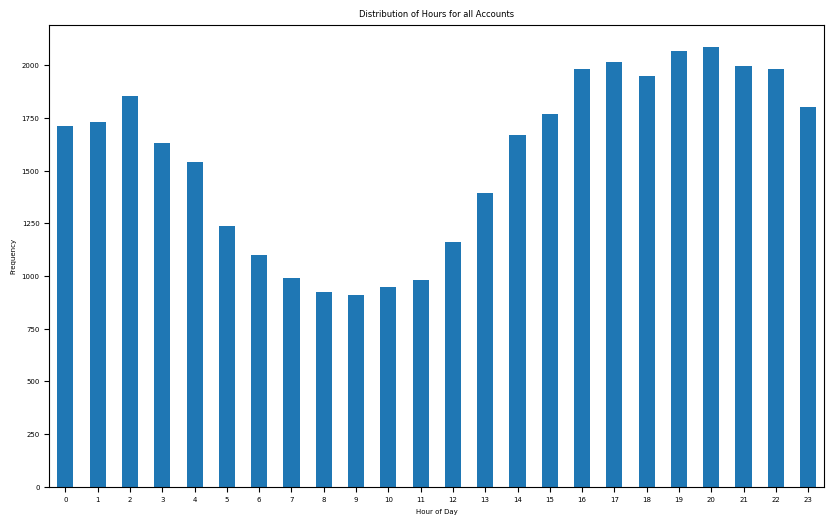

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# convert created_at to a datetime
df['created_at'] = pd.to_datetime(df['created_at'])

# new feature representing the hour the account was created.
df['created_at_hour'] = df['created_at'].dt.hour

# Count the occurrences of each hour
hour_counts = df['created_at_hour'].value_counts()

# Plot the distribution of hours
plt.figure(figsize=(10, 6))
hour_counts.sort_index().plot(kind='bar')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.title('Distribution of Hours for all Accounts')
plt.xticks(rotation=0)
plt.show()


This is a distribution of the hour of day accounts were created over all accounts. The most common times were around 3 pm - 2 am, and less accounts were created in hours outside of that interval. Let's now look at the separate distributions for bots and human account creation hours.

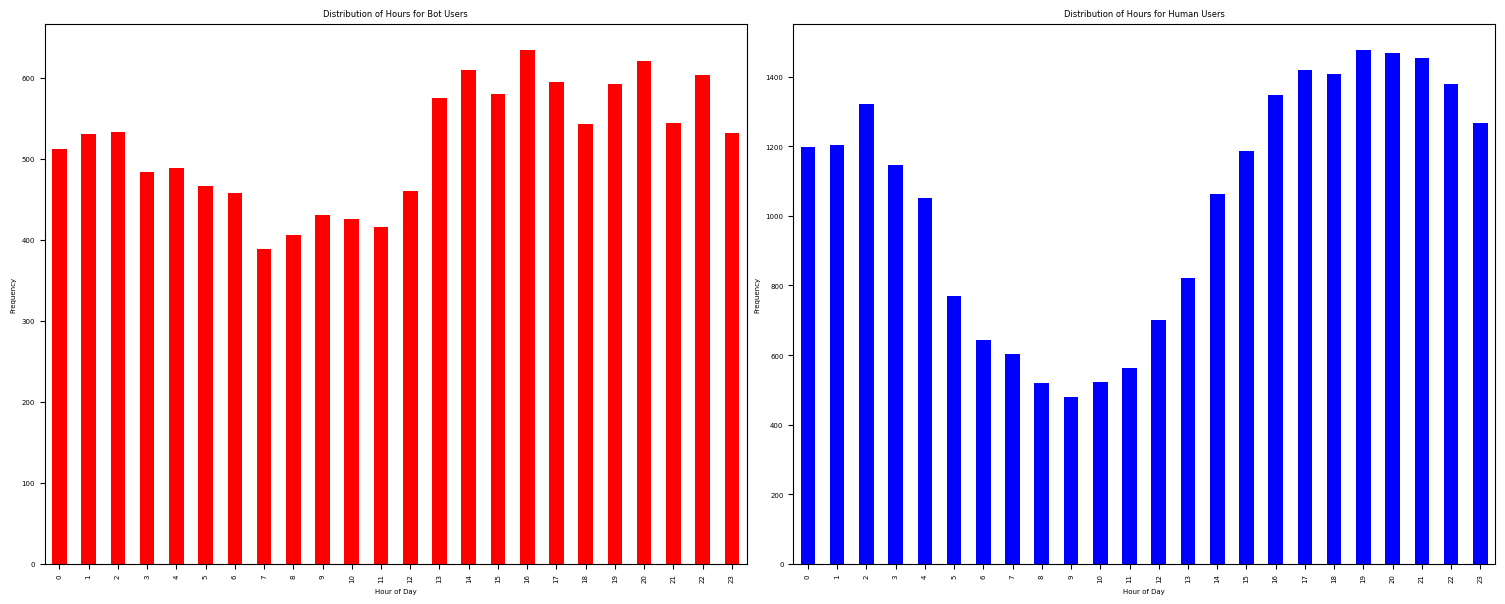

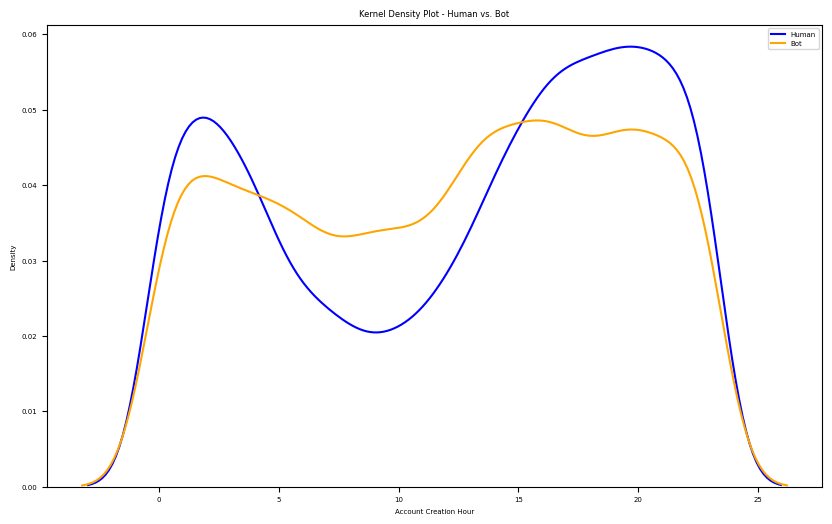

In [ ]:
import numpy as np
import seaborn as sns


bots_data_hours = df[df['account_type'] == "bot"]['created_at_hour']
non_bots_data_hours = df[df['account_type'] == "human"]['created_at_hour']

bots_hours = bots_data_hours.value_counts()
non_bots_hours = non_bots_data_hours.value_counts()


# Plot side-by-side Histograms
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot for bot users
bots_hours.sort_index().plot(kind='bar', ax=ax1, color='red')
ax1.set_title('Distribution of Hours for Bot Users')
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Frequency')

# Plot for human users
non_bots_hours.sort_index().plot(kind='bar', ax=ax2, color='blue')
ax2.set_title('Distribution of Hours for Human Users')
ax2.set_xlabel('Hour of Day')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Kernel Density Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(non_bots_data_hours, label='Human', color='blue')
sns.kdeplot(bots_data_hours, label='Bot', color='orange')
plt.title('Kernel Density Plot - Human vs. Bot')
plt.xlabel('Account Creation Hour')
plt.ylabel('Density')
plt.legend()
plt.show()


We notice here that there is a slight difference in distribution between the bots and human users' account creation hours. Human user's created_at time hour dips from 5am - 1pm more than the bot's does. However, as seen from the density plot, the human and bot account creation hour's follow a very similar pattern with hours throughout the day. While the human user's tend to have a more variant distribution with taller peaks and lower dips, we do not believe this feature will be a distinguishing feature between human and bot classifications.

## Statuses Count Feature Exploration and Analysis
This feature represents the **total number of tweets** sent out by the account. Let's explore the difference in distributions between the human and bot users to see if we can find a meaningful differentiation.

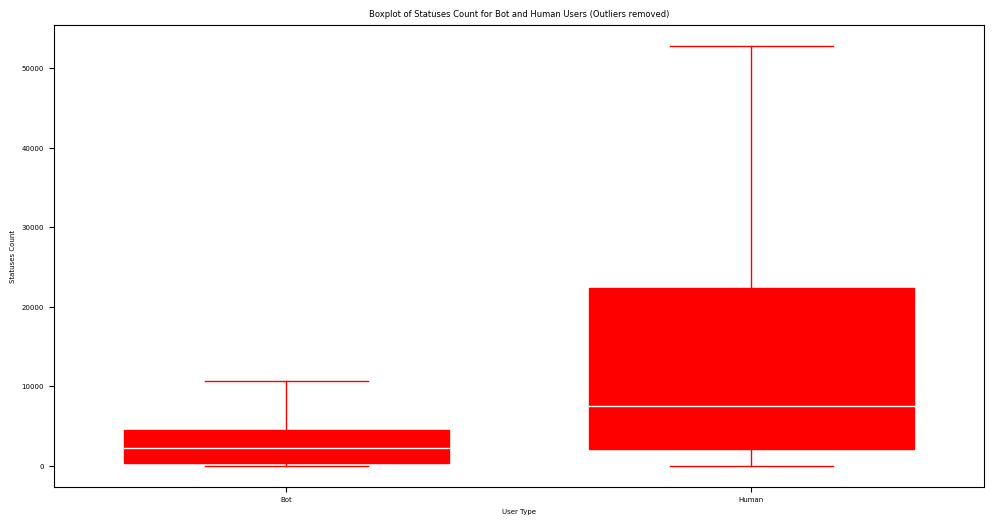

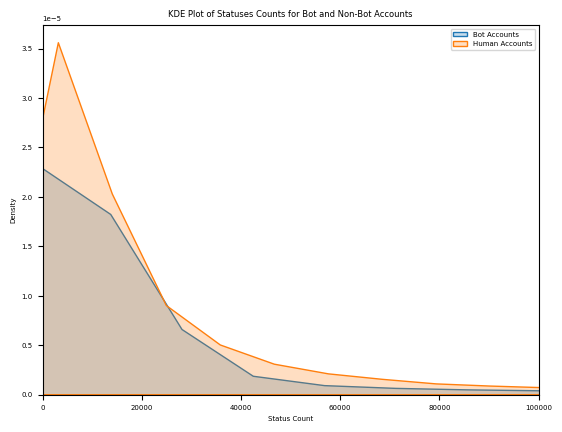

+-------+--------------------+--------------------+
|       |   Human_Statuses   |    Bot_Statuses    |
+-------+--------------------+--------------------+
| count |      25013.0       |      12425.0       |
| mean  | 21465.263223123977 | 20284.493521126762 |
|  std  | 46944.60590827038  | 96033.77343202749  |
|  min  |        0.0         |        0.0         |
|  25%  |       2093.0       |       405.0        |
|  50%  |       7551.0       |       2178.0       |
|  75%  |      22380.0       |       4481.0       |
|  max  |     2129049.0      |     2771910.0      |
+-------+--------------------+--------------------+


In [ ]:
from tabulate import tabulate

bots_data_statuses = bots_data['statuses_count']
non_bots_data_statuses = non_bots_data['statuses_count']

# Plot box plots
plt.figure(figsize=(12, 6))
plt.boxplot([bots_data_statuses, non_bots_data_statuses], labels=['Bot', 'Human'], widths=0.7, patch_artist=True, boxprops=dict(facecolor='red', color='red'), whiskerprops=dict(color='red'), capprops=dict(color='red'), medianprops=dict(color='white'), sym='')
plt.title('Boxplot of Statuses Count for Bot and Human Users (Outliers removed)')
plt.xlabel('User Type')
plt.ylabel('Statuses Count')
plt.show()

# Plot KDE for favorite counts
sns.kdeplot(bots_data_statuses, label='Bot Accounts', fill=True)
sns.kdeplot(non_bots_data_statuses,
            label='Human Accounts', fill=True)
plt.title('KDE Plot of Statuses Counts for Bot and Non-Bot Accounts')
plt.xlabel('Status Count')
plt.ylabel('Density')
plt.xlim(0,100000)
plt.legend()
plt.show()

# Show some statistics
data = {'Human_Statuses': non_bots_data_statuses,
        'Bot_Statuses': bots_data_statuses}

statuses = pd.DataFrame(data)

# Format describe() output using tabulate
describe_table = tabulate(statuses.describe(), headers='keys', tablefmt='pretty')

# Display the formatted table
print(describe_table)

From the plots above, we can see that the shape of the distribution of statuses counts between bots and humans is similar in that they are both skewed to the right with extremely high status count outliers. In general, the majority of humans' status counts seem to be more spread out, as shown with an IQR of 22380 - 2093 = 20,287 versus the bot's IQR of 4481 - 405 = 4,076. Interestingly enough, the mean of both distributions is quite similar, at around 20 - 21K tweets. This came as a surprise as I expected the bot data to have a much larger mean status count. While the distributions have distinct shapes, it may or may not prove to be a distinguishing feature for classification, so we will test out whether using it or not will prove to be fruitful.

## Verified Feature Exploration and Analysis
This feature represents whether or not the account is **verified on Twitter**. Let's break this down between humans and bots to see if we can find any patterns.

Table of verified counts for bot and human users
+-------+-----------+-------------+
|       | Bot Users | Human Users |
+-------+-----------+-------------+
| False |   12109   |    17778    |
| True  |    316    |    7235     |
+-------+-----------+-------------+


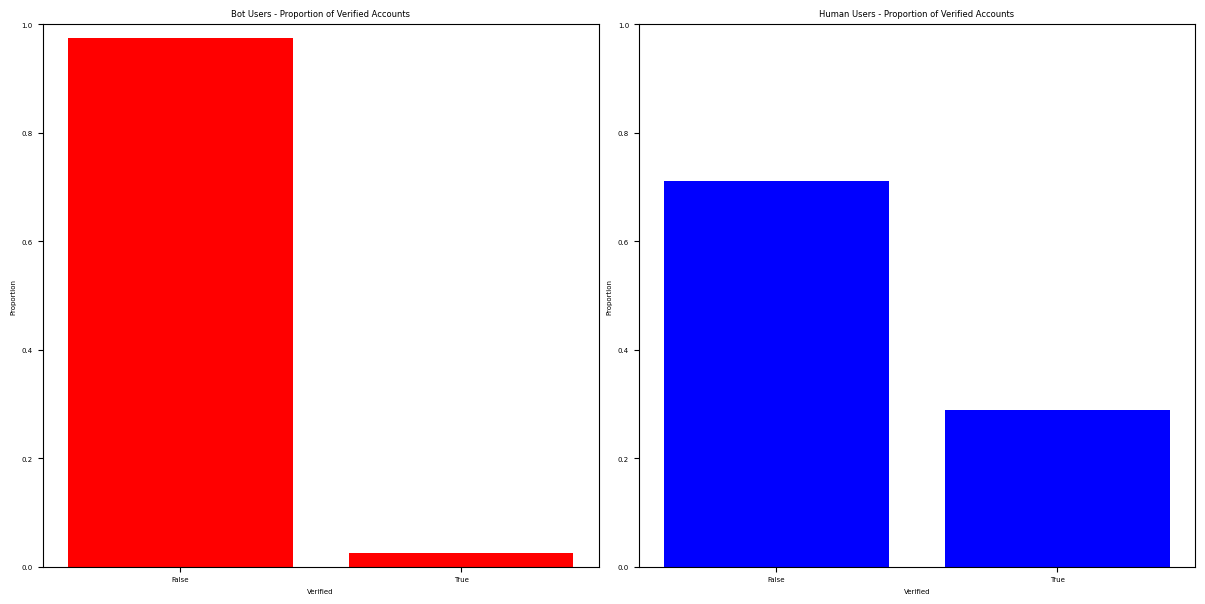

In [ ]:
bots_data_verified = bots_data['verified']
non_bots_data_verified = non_bots_data['verified']

counts_table = pd.DataFrame({
    'Bot Users': bots_data_verified.value_counts(),
    'Human Users': non_bots_data_verified.value_counts()
})

table = tabulate(counts_table, headers='keys', tablefmt='pretty')

# Display the formatted table
print("Table of verified counts for bot and human users")
print(table)

bot_verified_proportions = bots_data_verified.value_counts(normalize=True)
human_verified_proportions = non_bots_data_verified.value_counts(normalize=True)

# Plot side-by-side bar plots of verification proportions
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Bar plot for bot users
axs[0].bar(['False', 'True'], bot_verified_proportions, color='red')
axs[0].set_title('Bot Users - Proportion of Verified Accounts')
axs[0].set_xlabel('Verified')
axs[0].set_ylabel('Proportion')
axs[0].set_ylim(0, 1)  # Set y-axis limit to represent proportions

# Bar plot for human users
axs[1].bar(['False', 'True'], human_verified_proportions, color='blue')
axs[1].set_title('Human Users - Proportion of Verified Accounts')
axs[1].set_xlabel('Verified')
axs[1].set_ylabel('Proportion')
axs[1].set_ylim(0, 1)  # Set y-axis limit to represent proportions

plt.tight_layout()
plt.show()

From the comparison of verified proportions between bot and human accounts, we see an important distinction here. The proportion of users that are verified from human accounts are **much more** than that of the bot accounts. This would mean that if we come across an account that is verified, the graphs indicate that there is a higher likliehood that this account is a human user. This will likely be an important feature in making our classification decision.

##Favourites Count Feature Exploration and Analysis
This feature represents the total number of posts liked as favourite by a user. What does the distribution of the data look like through a histogram and how does the distribution change as observed through a kde plot?

Median number of favorited tweets is: 2066.0
Mean number of favorited tweets is: 12302.062182808912
NA favourite count: 0


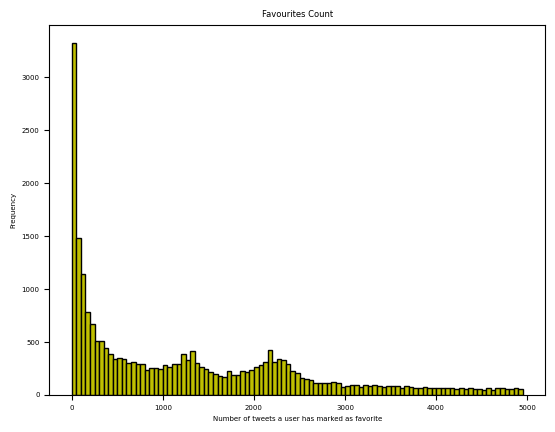

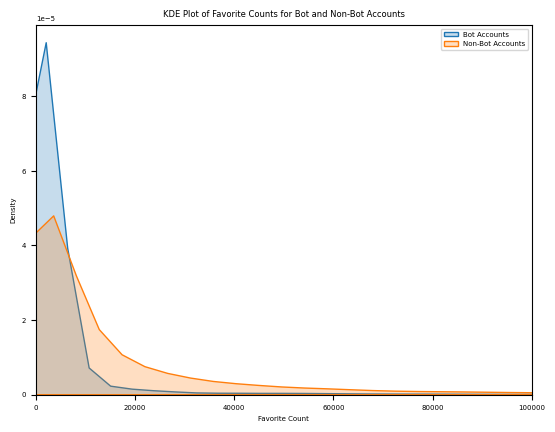

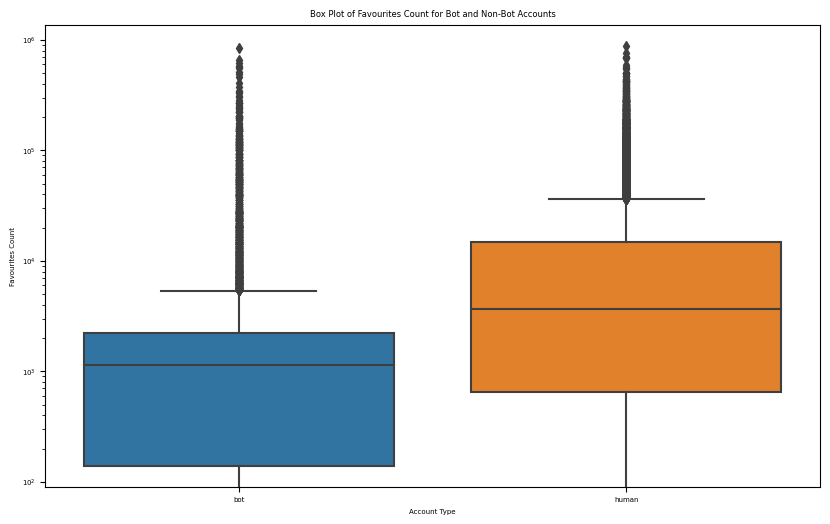

In [ ]:
print("Median number of favorited tweets is: "+ str(df.favourites_count.median()))
print("Mean number of favorited tweets is: " + str(df.favourites_count.mean()))
#How many values are missing?
print("NA favourite count: "+ str(df['favourites_count'].isna().sum()))

font = {'family': 'sans-serif',
        'weight': 'normal',
        'size': 5}
plt.rc('font', **font)
bin_edges = [i for i in range(1, 5000,50)]
plt.hist(df.favourites_count,bins=bin_edges, color='y', edgecolor='black')
plt.xlabel('Number of tweets a user has marked as favorite')
plt.ylabel('Frequency')
plt.title('Favourites Count')
plt.show()

#Bot vs non bot
bot_data = df[df['account_type'] == 'bot']
non_bot_data = df[df['account_type'] == 'human']

# Plot KDE for favorite counts
sns.kdeplot(bot_data['favourites_count'], label='Bot Accounts', fill=True)
sns.kdeplot(non_bot_data['favourites_count'],
            label='Non-Bot Accounts', fill=True)
plt.title('KDE Plot of Favorite Counts for Bot and Non-Bot Accounts')
plt.xlabel('Favorite Count')
plt.ylabel('Density')
plt.xlim(0,100000)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='account_type', y='favourites_count', data=df)
plt.title('Box Plot of Favourites Count for Bot and Non-Bot Accounts')
plt.xlabel('Account Type')
plt.ylabel('Favourites Count')
plt.yscale('log')  # Use log scale for better visibility if the values have a wide range
plt.show()



We see the majority of users have a very low favourite count in our histogram but a very long tail to the right with a small minority having very high favourite counts as evidenced by the large mean, but small median. Our KDE plot tells us that the non-bot accounts generally seem to have slightly higher favourite counts than non-bot accounts but doesn't seem to be very large. Our boxplot shows reasonable separation so we can consider this feature to use.

##Friends Count Exploration and Analysis
This feature represents the total number of friends, the total number of users a user follows. What does the distribution of the data look like through a histogram and how does the distribution change as observed through a kde plot?

Median number of friends is: 296.0
Mean number of friends is: 4445.925182969176
NA friends count: 0


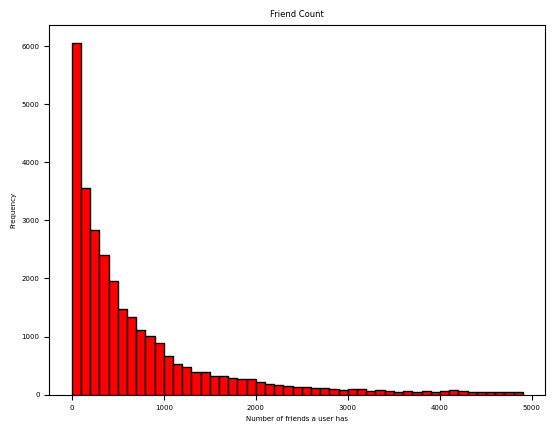

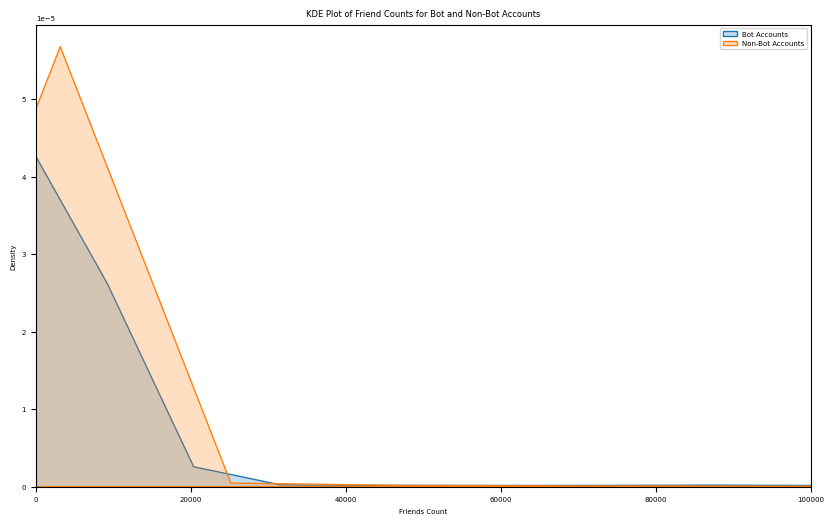

In [ ]:
print("Median number of friends is: " +
      str(df.friends_count.median()))
print("Mean number of friends is: " +
      str(df.friends_count.mean()))
# How many values are missing?
print("NA friends count: " + str(df['friends_count'].isna().sum()))
bin_edges = [i for i in range(1, 5000,100)]
plt.hist(df.friends_count, bins=bin_edges, color='r', edgecolor='black')
plt.xlabel('Number of friends a user has')
plt.ylabel('Frequency')
plt.title('Friend Count')
plt.show()

# Plot KDE for favorite counts
plt.figure(figsize=(10, 6))
sns.kdeplot(bot_data['friends_count'], label='Bot Accounts', fill=True)
sns.kdeplot(non_bot_data['friends_count'],
            label='Non-Bot Accounts', fill=True)
plt.title('KDE Plot of Friend Counts for Bot and Non-Bot Accounts')
plt.xlabel('Friends Count')
plt.ylabel('Density')
plt.xlim(0, 100000)
plt.legend()
plt.show()

We see the majority of users have a very low friend count in our histogram but a very long tail to the right with a small minority having very high friend counts as evidenced by our histogram and the huge mean compared to median. Our KDE plot tells us that the non-bot accounts generally seem to have slightly lower friend counts than non-bot accounts and that this is a decent feature to consider using.

##Follower Count Exploration and Analysis
This feature represents the total number of followers, the total number of users that are following that user. What does the distribution of the data look like through a histogram and how does the distribution change as observed through a kde plot?

Median number of followers is: 365.0
Mean number of followers is: 370309.8302793953
NA follower count: 0


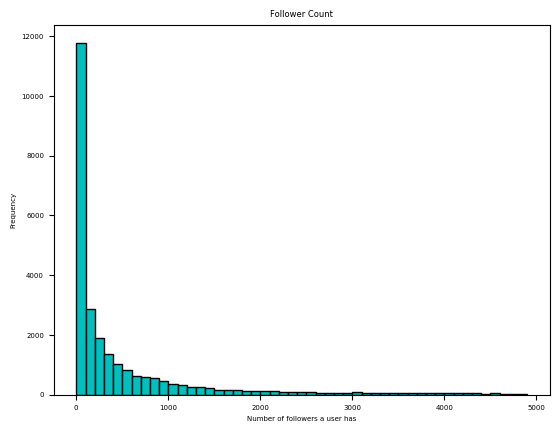

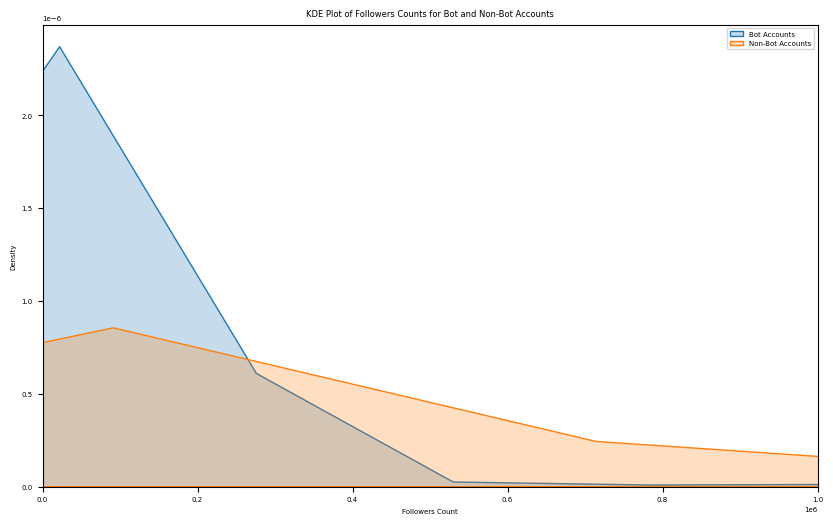

In [ ]:
print("Median number of followers is: " +
      str(df.followers_count.median()))
print("Mean number of followers is: " +
      str(df.followers_count.mean()))
# How many values are missing?
print("NA follower count: " + str(df['followers_count'].isna().sum()))
bin_edges = [i for i in range(1, 5000,100)]
plt.hist(df.followers_count, bins=bin_edges, color='c', edgecolor='black')
plt.xlabel('Number of followers a user has')
plt.ylabel('Frequency')
plt.title('Follower Count')
plt.show()

# Plot KDE for follower counts
plt.figure(figsize=(10, 6))
sns.kdeplot(bot_data['followers_count'], label='Bot Accounts', fill=True)
sns.kdeplot(non_bot_data['followers_count'],
            label='Non-Bot Accounts', fill=True)
plt.title('KDE Plot of Followers Counts for Bot and Non-Bot Accounts')
plt.xlabel('Followers Count')
plt.ylabel('Density')
plt.xlim(0, 1000000)
plt.legend()
plt.show()

We see the majority of users have a follower count of around 365 with a small minority having very high favourite counts. Our KDE plot tells us that the non-bot accounts generally seem to have higher follower counts than non-bot accounts and that this is a good feature to consider using.

##Exploring and Engineering using followers, friends, and favourites count

Are there any useful relationships that would make sense to explore using these numerics data that could be possible features to engineer?
One potential area is maybe bots have low followers counts but high number of friends (people they follow).

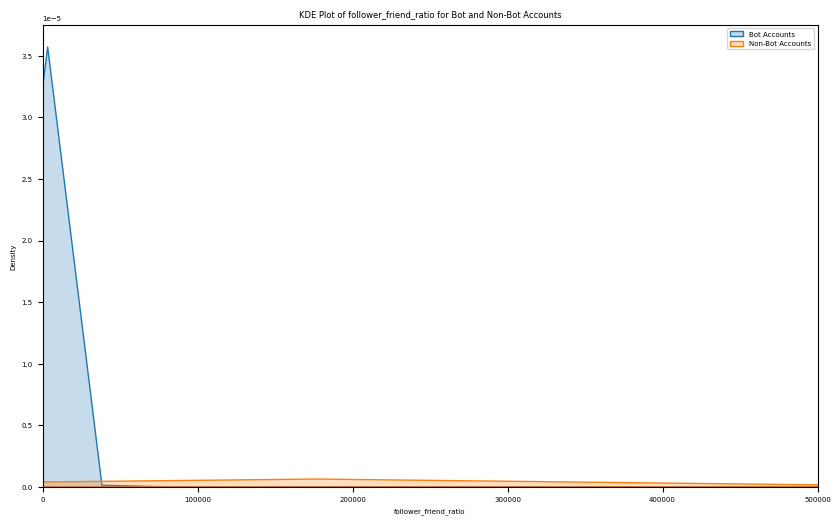

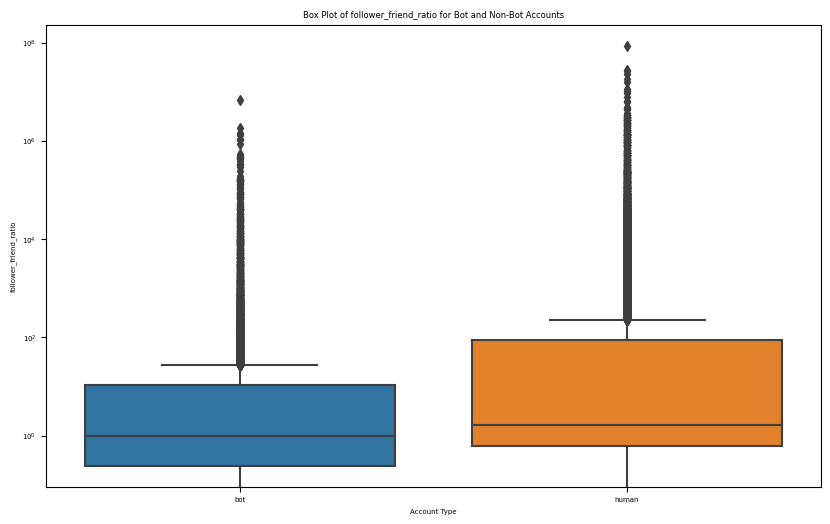

In [ ]:
#Feature Engineering, create temp variable:
temp = df.copy(deep=True)
temp['follower_friend_ratio'] = temp['followers_count'] / (temp['friends_count'] + 1)
bot_data = temp[temp['account_type'] == 'bot']
non_bot_data = temp[temp['account_type'] == 'human']
plt.figure(figsize=(10, 6))
sns.kdeplot(bot_data['follower_friend_ratio'], label='Bot Accounts', fill=True)
sns.kdeplot(non_bot_data['follower_friend_ratio'],
            label='Non-Bot Accounts', fill=True)
plt.title('KDE Plot of follower_friend_ratio for Bot and Non-Bot Accounts')
plt.xlabel('follower_friend_ratio')
plt.ylabel('Density')
plt.xlim(0, 500000)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='account_type', y='follower_friend_ratio', data=temp)
plt.title('Box Plot of follower_friend_ratio for Bot and Non-Bot Accounts')
plt.xlabel('Account Type')
plt.ylabel('follower_friend_ratio')
plt.yscale('log')
plt.show()

The follower to friends ratio seems to give us good separation between bots and human users as bots have a lower follower_friends_ratio. Let's add this feature to our main dataframe

In [ ]:
df['follower_friend_ratio'] = df['followers_count'] / (df['friends_count'] + 1)

What about what human activity looks like? Perhaps the number of posts a human favourites is proportional to their number of friends, but the same might not be true for bots.

Mean favourites_friend_ratio: 226.77917785268176
Median favourites_friend_ratio: 11.53241787829833


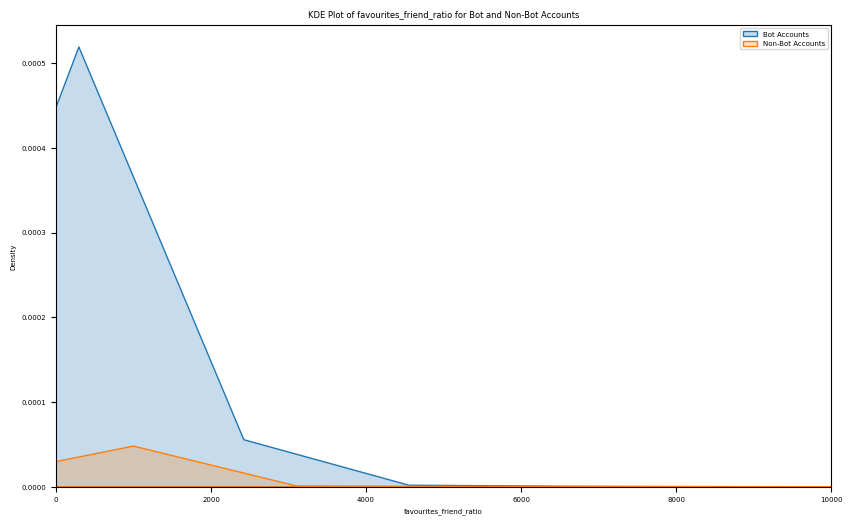

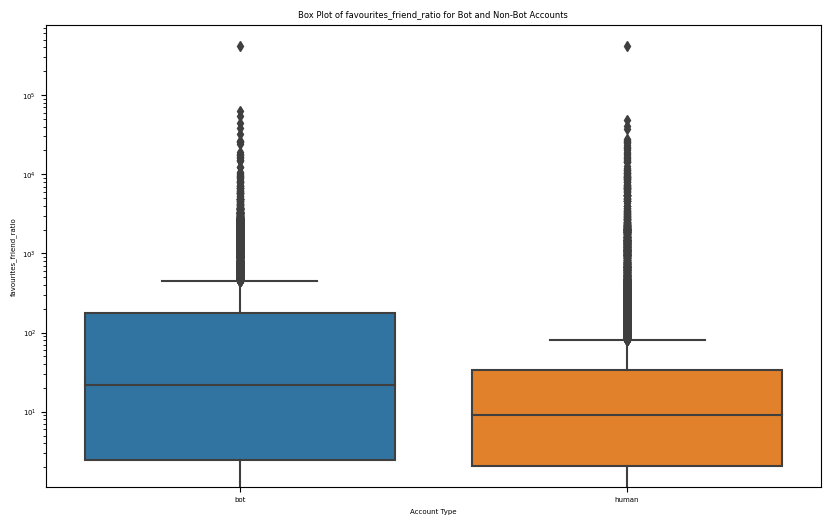

In [ ]:
# Maybe human like activity is low number of favourites, if low number of friends?
temp['favourites_friend_ratio'] = temp['favourites_count'] / \
    (temp['friends_count'] + 1)
print("Mean favourites_friend_ratio: "+str(temp['favourites_friend_ratio'].mean()))
print("Median favourites_friend_ratio: "+str(temp['favourites_friend_ratio'].median()))
bot_data = temp[temp['account_type'] == 'bot']
non_bot_data = temp[temp['account_type'] == 'human']
plt.figure(figsize=(10, 6))
sns.kdeplot(bot_data['favourites_friend_ratio'],
            label='Bot Accounts', fill=True)
sns.kdeplot(non_bot_data['favourites_friend_ratio'],
            label='Non-Bot Accounts', fill=True)
plt.title('KDE Plot of favourites_friend_ratio for Bot and Non-Bot Accounts')
plt.xlabel('favourites_friend_ratio')
plt.ylabel('Density')
plt.xlim(0, 10000)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='account_type', y='favourites_friend_ratio', data=temp)
plt.title('Box Plot of favourites_friend_ratio for Bot and Non-Bot Accounts')
plt.xlabel('Account Type')
plt.ylabel('favourites_friend_ratio')
plt.yscale('log')
plt.show()


Low separation in our kde and boxplots. Doesn't seem like this engineered feature is going to be very useful. Onwards!

##Screen Names Feature Exploration and Analysis
 What are potential features we can extract from a user's twitter screen name? Lets test some potential features and analyze their quality by running statistical tests to see if the results are significantly different for bot and non-bot groups. We can also visualize the difference in a kde plot. Features considered are: length of the name, number of digits in the name, number of uppercase letters, number of lower case letters, if it contains_special_characters, contains_underscore_or_hyphen,
                     and if the first_char_uppercase.


Feature: screen_name_length
T-Test: t-statistic = 1.5143173374575802, p-value = 0.12995850724084534
Mann-Whitney U Test: U-statistic = 156759639.0, p-value = 0.16267866375352402


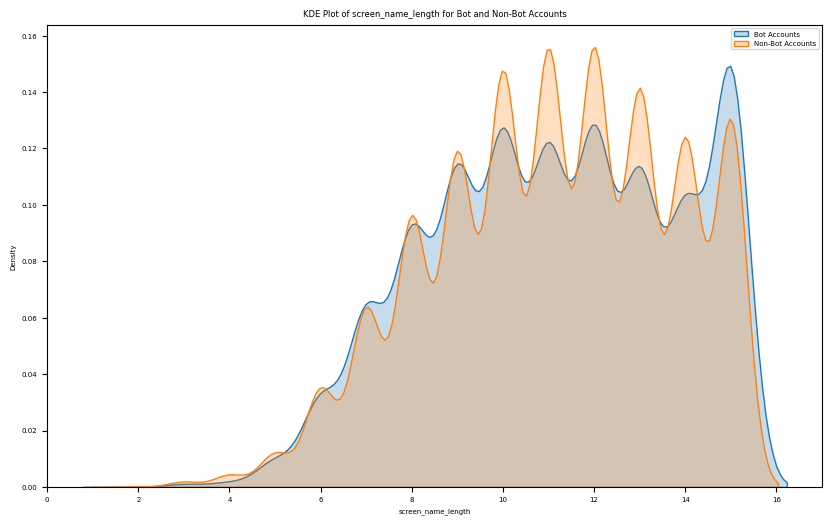


Feature: num_digits
T-Test: t-statistic = 31.831130847223207, p-value = 2.915919184161354e-216
Mann-Whitney U Test: U-statistic = 182367287.5, p-value = 4.671116977984751e-272


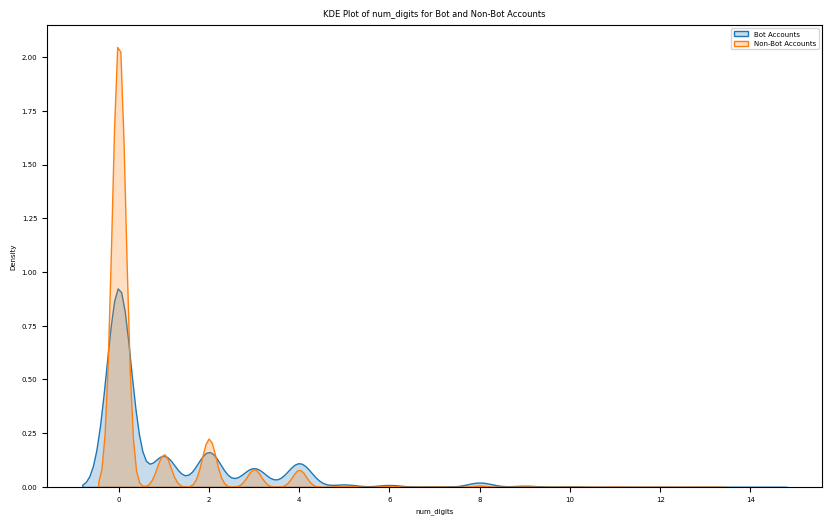


Feature: num_uppercase
T-Test: t-statistic = -9.201758403682742, p-value = 3.7890536471817776e-20
Mann-Whitney U Test: U-statistic = 142898989.0, p-value = 9.886097753840494e-43


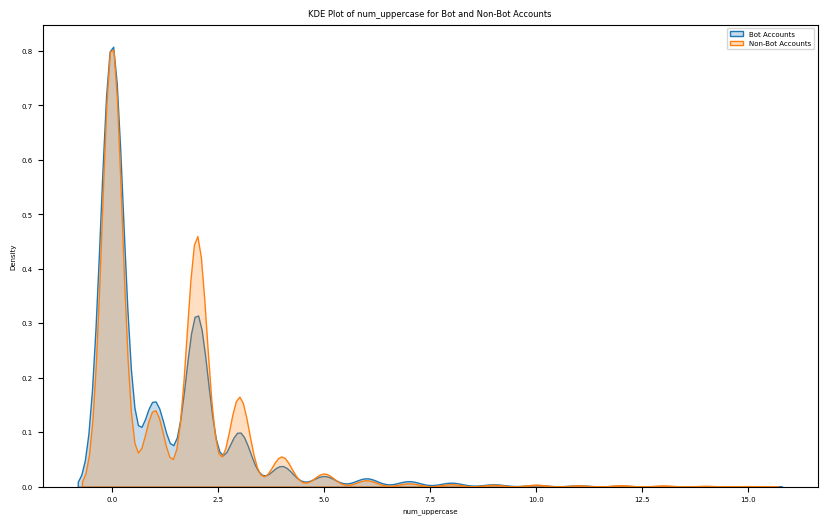


Feature: num_lowercase
T-Test: t-statistic = -9.52264451606205, p-value = 1.8425182495984364e-21
Mann-Whitney U Test: U-statistic = 145623768.0, p-value = 2.1297415262039198e-23


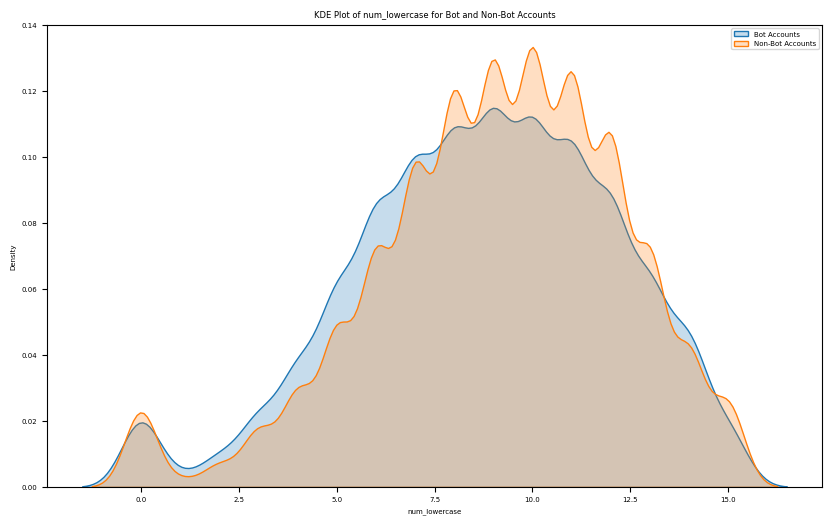


Feature: contains_special_characters
T-Test: t-statistic = 0.6380918007055582, p-value = 0.5234198508007297
Mann-Whitney U Test: U-statistic = 155794212.0, p-value = 0.5225071753579921


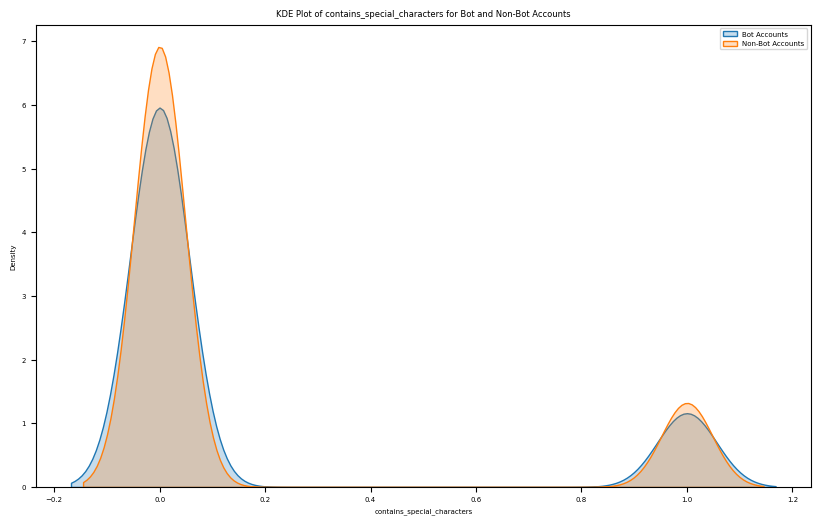


Feature: contains_underscore_or_hyphen
T-Test: t-statistic = 0.6380918007055582, p-value = 0.5234198508007297
Mann-Whitney U Test: U-statistic = 155794212.0, p-value = 0.5225071753579921


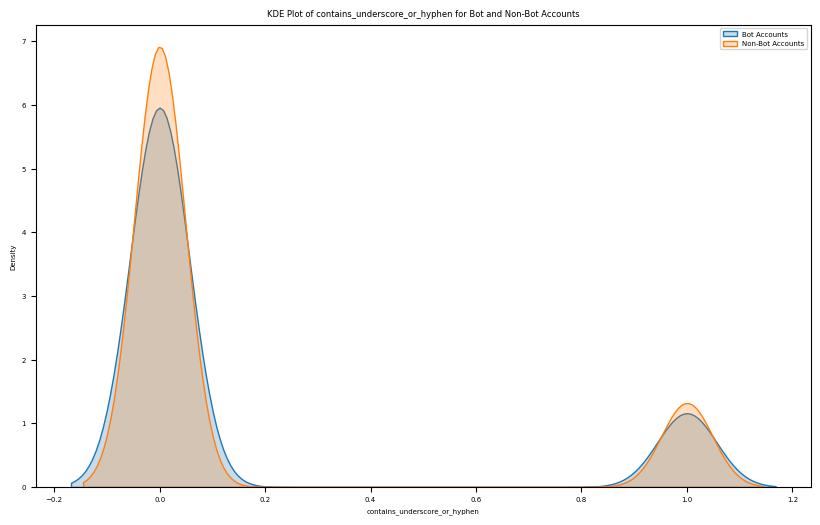


Feature: first_char_uppercase
T-Test: t-statistic = -14.249066789545441, p-value = 6.860797373009971e-46
Mann-Whitney U Test: U-statistic = 143358147.5, p-value = 2.0646208649176516e-45


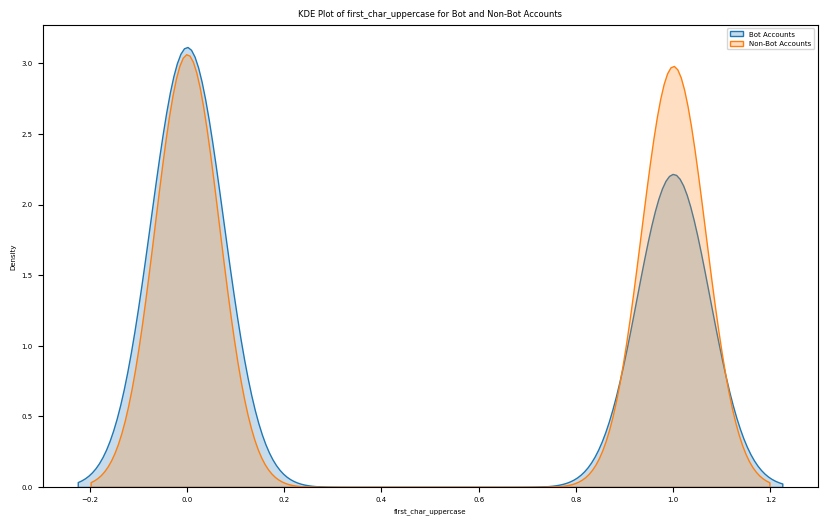

In [ ]:
from scipy.stats import ttest_ind, mannwhitneyu
import matplotlib.pyplot as plt
import seaborn as sns
def count_digits(s):
    return sum(c.isdigit() for c in s)
def count_uppercase(s):
    return sum(c.isupper() for c in s)
def count_lowercase(s):
    return sum(c.islower() for c in s)
def contains_special_characters(s):
    return any(not c.isalnum() for c in s)
temp['screen_name_length'] = temp['screen_name'].apply(len)
temp['num_digits'] = temp['screen_name'].apply(count_digits)
temp['num_uppercase'] = temp['screen_name'].apply(count_uppercase)
temp['num_lowercase'] = temp['screen_name'].apply(count_lowercase)
temp['contains_special_characters'] = temp['screen_name'].apply(
    contains_special_characters)
temp['contains_underscore_or_hyphen'] = temp['screen_name'].apply(
    lambda x: '_' in x or '-' in x)
temp['first_char_uppercase'] = temp['screen_name'].apply(
    lambda x: x[0].isupper())

# List of features to test
features_to_test = ['screen_name_length', 'num_digits', 'num_uppercase', 'num_lowercase',
                     'contains_special_characters', 'contains_underscore_or_hyphen',
                     'first_char_uppercase']

# Perform t-tests and Mann-Whitney U tests
for feature in features_to_test:
    print(f"\nFeature: {feature}")

    # Separate data for bot and non-bot accounts
    bot_data = temp[temp['account_type'] == 'bot'][feature]
    non_bot_data = temp[temp['account_type'] == 'human'][feature]

    # Perform t-test (assuming normal distribution)
    t_statistic, p_value_ttest = ttest_ind(bot_data, non_bot_data, equal_var=False)
    # Perform Mann-Whitney U test (non-parametric alternative)
    u_statistic, p_value_mw = mannwhitneyu(bot_data, non_bot_data, alternative='two-sided')

    print(f"T-Test: t-statistic = {t_statistic}, p-value = {p_value_ttest}")
    print(f"Mann-Whitney U Test: U-statistic = {u_statistic}, p-value = {p_value_mw}")

    # Visualize the distribution of the feature for bot and non-bot accounts
    plt.figure(figsize=(10, 6))
    sns.kdeplot(bot_data, label='Bot Accounts', fill=True)
    sns.kdeplot(non_bot_data, label='Non-Bot Accounts', fill=True)
    plt.title(f'KDE Plot of {feature} for Bot and Non-Bot Accounts')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

  Number of digits and if the first character is uppercase give decent results in significance tests and show good differences in KDE plot. Lets add those features to our data.

In [ ]:
    df['num_digits_screen_name'] = df['screen_name'].apply(count_digits)
    df['first_char_uppercase_screen_name'] = df['screen_name'].apply(lambda x: x[0].isupper())

## Exploring URLs
The features "profile_background_url" and "profile_background_image_url" contains a link to the user's profile image and profile background image respectively. What are the trends of default profile and header images to the acccount being a bot versus human-operated?



In [ ]:
# default_bg = "http://abs.twimg.com/images/themes/theme1/bg.png"

bots_all =  df[df['account_type'] == "bot"]
humans_all =  df[df['account_type'] == "human"]

# background profile backgroun img url
print('Percentage of default backgrounds for bots:')
print(bots_all['profile_background_image_url'].value_counts().head()/len(bots_all))
print('Percentage of default backgrounds for humans:')
print(humans_all['profile_background_image_url'].value_counts().head()/len(humans_all))
# bots: 8120 humans: 13697 from value_counts()

Percentage of default backgrounds for bots:
http://abs.twimg.com/images/themes/theme1/bg.png     0.653521
unknown                                              0.172555
http://abs.twimg.com/images/themes/theme14/bg.gif    0.032918
http://abs.twimg.com/images/themes/theme9/bg.gif     0.022777
http://abs.twimg.com/images/themes/theme10/bg.gif    0.016258
Name: profile_background_image_url, dtype: float64
Percentage of default backgrounds for humans:
http://abs.twimg.com/images/themes/theme1/bg.png     0.547595
unknown                                              0.094151
http://abs.twimg.com/images/themes/theme14/bg.gif    0.076040
http://abs.twimg.com/images/themes/theme9/bg.gif     0.054172
http://abs.twimg.com/images/themes/theme10/bg.gif    0.029665
Name: profile_background_image_url, dtype: float64


In [ ]:
# default profile img url: http://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png

# background profile img url
print('percentage of default profile img for bots:')
print(bots_all['profile_image_url'].value_counts().head()/len(bots_all))
print('percentage of default profile for humans:')
print(humans_all['profile_image_url'].value_counts().head()/len(humans_all))


percentage of default profile img for bots:
http://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png    0.030825
http://pbs.twimg.com/profile_images/787412182602428416/5WawZkPa_normal.jpg       0.000080
http://pbs.twimg.com/profile_images/1013286566763159552/-9Z2wz_n_normal.jpg      0.000080
http://pbs.twimg.com/profile_images/587113317463957504/_Itcmrdx_normal.jpg       0.000080
http://pbs.twimg.com/profile_images/971064916785467392/6SadaGHx_normal.jpg       0.000080
Name: profile_image_url, dtype: float64
percentage of default profile for humans:
http://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png                          0.006996
http://pbs.twimg.com/profile_images/802329632838037504/CQN6gP7k_normal.jpg                             0.000040
http://pbs.twimg.com/profile_images/1295249558881161216/_PVdMmIl_normal.jpg                            0.000040
http://pbs.twimg.com/profile_images/378800000580028085/9ef659385a4126f44481ab4bc6104de4_

For both the profile and profile background images, the default (theme1/bg.png and default_profile_normal.png) have the highest percentages of use for both humans and bots. Due to the dataset, however, there is also a portion of 'unknown' URLs that we do not have knowledge of, whether they are invalid URLs or an error in getting the default profiles' links. For the purposes of reducing the dimensionality of our models, we may choose to not use these features as the percentage differences are minimal.

## Default Accounts Feature Exploration and Analysis
This is a boolean feature on whether the account is categorized as a 'default account'.

In [ ]:
default_bot = bots_all[bots_all['default_profile'] == 1]
default_hum = humans_all[humans_all['default_profile'] == 1]
print('Percentage of default bot accounts: \n', len(default_bot)/len(bots_all))
print('Percentage of default human accounts: \n', len(default_hum)/len(humans_all))


Percentage of default bot accounts: 
 0.6230181086519114
Percentage of default human accounts: 
 0.3189941230560109


There is a significant higher percentage of bot accounts that are categorized as default. This a good feature to keep in mind for classification.

## Average tweets per day and account age Feature Exploration and Analysis

We can use the average tweets per day feature and the account age (in days) feature to explore the distribution between human and bot accounts.

Average tweets per day
Average bot: 7.252240643863179
Median bot 0.817
Average human 6.712555910926318
Median human 2.41


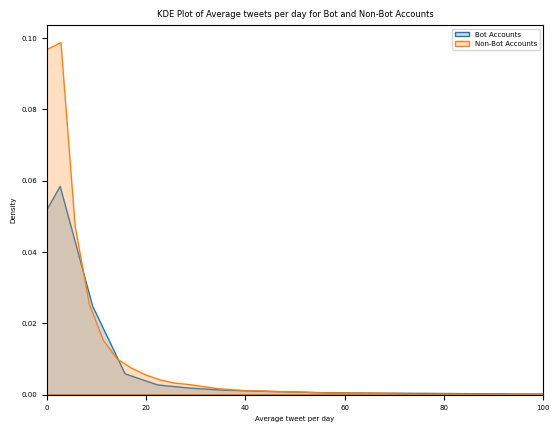

In [ ]:
import statistics
from numpy.ma.extras import average

# avg tweets per day
print('Average tweets per day')
bots_avg = df[df['account_type'] == "bot"]['average_tweets_per_day']
non_bots_avg = df[df['account_type'] == "human"]['average_tweets_per_day']

print('Average bot:', average(bots_avg))
print('Median bot', statistics.median(bots_avg))
print('Average human', average(non_bots_avg))
print('Median human', statistics.median(non_bots_avg))
# Plot KDE for average counts
plt.figure()
sns.kdeplot(bots_avg, label='Bot Accounts', fill=True)
sns.kdeplot(non_bots_avg, label='Non-Bot Accounts', fill=True)
plt.title('KDE Plot of Average tweets per day for Bot and Non-Bot Accounts')
plt.xlabel('Average tweet per day')
plt.ylabel('Density')
# setting x limit for better visualize distribution and cut off trailing maximums
plt.xlim(0, 100)
plt.legend()
plt.show()



There is a significant difference in distribution between the averages of bots versus human accounts, so we will add this feature to the final dataframe when building our models.

Account age in days
Average bot: 2717.2749295774647
Median bot 2882
Average human 3173.5613081197776
Median human 3395


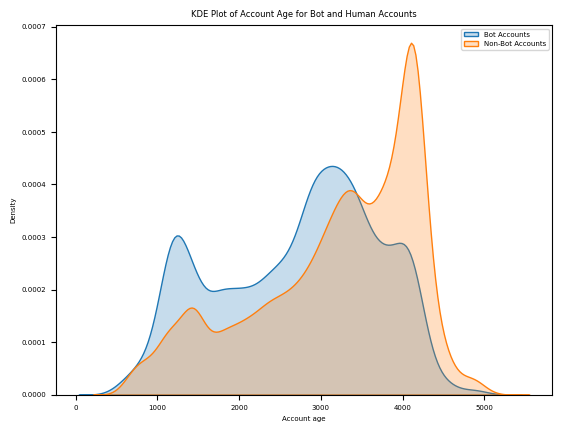

In [ ]:
# account age
print('Account age in days')
bots_avg = df[df['account_type'] == "bot"]['account_age_days']
non_bots_avg = df[df['account_type'] == "human"]['account_age_days']

print('Average bot:', average(bots_avg))
print('Median bot',statistics.median(bots_avg))
print('Average human', average(non_bots_avg))
print('Median human', statistics.median(non_bots_avg))

# Plot KDE for account age
plt.figure()
sns.kdeplot(bots_avg, label='Bot Accounts', fill=True)
sns.kdeplot(non_bots_avg, label='Non-Bot Accounts', fill=True)
plt.title('KDE Plot of Account Age for Bot and Human Accounts')
plt.xlabel('Account age')
plt.ylabel('Density')
# setting x limit for better visualize distribution and cut off trailing maximums
plt.legend()
plt.show()



There is a significant difference in the distribution of account age for bots versus human accounts, as human accounts on average are older by bot accounts by around a year. We will likely use this feature in our classification models.

##Features Exploration Summary

We've explored all of the existing 20 features in the basic dataset, and from them, have been able to not only identify the features that have the largest distribution towards the outcome variable, but have also been able to feature engineer our own features. This is a summary of all our findings - both existing features and engineered features.

- `description_length`: Character count within description. **Moderately important.** Bots on average have lower characters than humans.
- `word_count`: Word count within description. **Moderately important.** Bots on average have lower word count than humans.
- `contains_bot_keyword`: Binary feature - 1 if their description contains a translation of the word 'bot' or 'robot'. **Extremely important.** If value is 1, highly likely (95%) to be a bot.
- `contains_hashtag`: Binary feature - 1 if their description contains a hashtag, 0 if not. **Minimally important.** Humans on average are 10% more likely to have a hashtag.
- `contains_url`: Binary feature - 1 if their description contains a URL, 0 if not. **Minimally important**. Bots on average are 5% more likely to have a URL.
- `account_age_days`: Total number of days since account creation. **Moderately important**. Bots have on average lower account age than human accounts.
- `average_tweets_per_day`: Minimally important. Humans on average have a slightly higher average than bot accounts.

- `favourites count`: Total number of posts marked as favourite by a user.  **Moderately important**. Bots have slightly lower favourite count on average.

- `friends count`: Number of users another user follows.  **Moderately important**. Bots have more friends on average.

- `followers count`: Total number of users that follow this user.  **Moderately important**. Bots have lower followers on average.

- `follower_friend_ratio`: The follower count divided by (1 + friend count). **Moderately important.** Bots usually have low follower to friend ratio.

- `num_digits_screen_name`: Number of digits in a users name. **Moderately important.** Bots have more digits in their user name

- `first_char_uppercase_screen_name`: If the first character is capitalized in the screen name (1 or 0) **Moderately important.** Capitalization seems to be more human.

- `created_at_hour`: Hour the account was created. Minimally important (bot and human accounts followed a similar distribution)

- `statuses_count`: Total number of tweets from this account. **Moderately important** based on distribution of bot and humans.

- `verified`: Whether or not the account is verified. **Very important**. Verified users are much more likely to be human.



## Exploring Clustering

Here, we explore whether or not our data is naturally separable into 2 clusters: either bot or human account data. We use k-means with k = 2 along with relevant features from our exploration above to evaluate the clustering tendency of our data.

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

features_for_clustering = ['description_length','word_count', 'favourites_count', 'verified', 'contains_bot_keyword', 'average_tweets_per_day']

# Extract the relevant features
data_for_clustering = df[features_for_clustering]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

# Apply K-Means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_data)

# Map cluster labels to actual labels
cluster_mapping = {0: 'human', 1: 'bot'}
df['predicted_label'] = df['cluster'].map(cluster_mapping)

# Evaluate the accuracy of the clusters
accuracy = accuracy_score(df['account_type'], df['predicted_label'])
conf_matrix = confusion_matrix(df['account_type'], df['predicted_label'])

print(f'Accuracy: {accuracy * 100:.2f}%')
print('Confusion Matrix:')
print(conf_matrix)

silhouette_avg = silhouette_score(scaled_data, df['cluster'])
print(f'Silhouette Score: {silhouette_avg}')

cluster_counts = df['cluster'].value_counts()
print('Cluster Distribution:')
print(cluster_counts)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy: 58.05%
Confusion Matrix:
[[ 9262  3163]
 [12543 12470]]
Silhouette Score: 0.4155004698144428
Cluster Distribution:
1    21805
0    15633
Name: cluster, dtype: int64


This shows that our data is slightly clustered, but it's not particularly strong. In terms of accuracy, the clustering predicted better than a random guess. The Silhouette Score of .42 is slightly indicative of a clustering tendency, but not enough to make a strong case for. Now, onwards to creating other classification models to predict whether an account is a human or a bot!

# Modeling

We'll be building and testing the following different machine learning models for our dataset:
1. Decision Trees
2. K-Nearest Neighbors
3. Naive Bayes
4. Support Vector Machines

## Decision Trees
Let's try using a Decision Tree Classifier. We will use ScikitLearn for this. We have chosen 'description_length', 'word_count', 'favourites_count', 'verified', 'contains_bot_keyword', and 'average_tweets_per_day' as features to include since they were distinctive features between human and bots as seen with the feature exploration from above. We do not need to scale the features in decision trees. We will perform nested cross-validation with hyperparameter tuning and holding out test sets to evaluate the generalized accuracy of the tuned, cross-validated model.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

feature_columns = ['description_length','word_count', 'favourites_count', 'verified', 'contains_bot_keyword', 'average_tweets_per_day']
features = df[feature_columns]
labels = df['account_type']

dt_classifier = DecisionTreeClassifier()

# Hyperparameters to tune
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20, 30, 40],
    'min_samples_leaf': [10, 15, 20, 50],
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform nested cross-validation
nested_scores = cross_val_score(grid_search, features, labels, cv=5)

print("Nested Cross-Validation Accuracy ", nested_scores.mean())

Nested Cross-Validation Accuracy  0.8229605461432294


Using a decision tree with the features mentioned above resulted to be a very strong model with a generalized accuacy of around 82%. Now, let's actually build our decision tree model.

In [ ]:
import time
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)
start_time = time.time()
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_decision_tree_model = grid_search.best_estimator_
end_time = time.time()
print('Elapsed Time (s): ', end_time-start_time)

# Predict with best decision tree model
y_pred = best_decision_tree_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with best hyperparamters: ", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Best Parameters: {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 50}
Elapsed Time (s):  32.740692138671875
Accuracy with best hyperparamters:  0.8223824786324786
Classification Report:
              precision    recall  f1-score   support

         bot       0.76      0.69      0.72      2500
       human       0.85      0.89      0.87      4988

    accuracy                           0.82      7488
   macro avg       0.80      0.79      0.80      7488
weighted avg       0.82      0.82      0.82      7488



We were pretty happy with these results! The precision and recall for both bots and humans were quite high (all above 67%). The f1-scores were also quite good (.71 and .87), and they suggest that the model was slightly better at classifying humnas. The recall for humans was especially high at 90%, which means that out of all the actual human instances, the model was able to correctly able to identify 90% of them. The recall for the bot class was the lowest, meaning that the model wasn't as good as correctly identifying a bot out of the actual bot examples. This means that while many bots contained clear indicators that they weren't human, some were very well hidden and acted very similar to humans. Overall, the decision tree classifier worked very well for our dataset.

## K Nearest Neighbors

We will use ScikitLearn to implement the KNN algorithm onto our dataset.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, classification_report
import time

feature_columns = ['description_length','word_count', 'contains_bot_keyword', 'contains_hashtag',
                   'favourites_count', 'friends_count', 'followers_count', 'follower_friend_ratio',
                   'num_digits_screen_name', 'first_char_uppercase_screen_name',
                   'statuses_count', 'verified', 'average_tweets_per_day', 'account_age_days']
features = df[feature_columns]
labels = df['account_type']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=66)

# KNN parameter grid:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
}

start_time = time.time()
knn_classifier = KNeighborsClassifier()
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

best_knn_model = grid_search.best_estimator_
y_pred = best_knn_model.predict(X_test)

# check accuracy
accuracy = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_mat)
classification_rep = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)

end_time = time.time()
print('Elapsed Time (s): ', end_time-start_time)

Best Hyperparameters: {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Confusion Matrix:
 [[1888  574]
 [ 431 4595]]
Accuracy: 0.87
Classification Report:
               precision    recall  f1-score   support

         bot       0.81      0.77      0.79      2462
       human       0.89      0.91      0.90      5026

    accuracy                           0.87      7488
   macro avg       0.85      0.84      0.85      7488
weighted avg       0.86      0.87      0.86      7488

Elapsed Time (s):  43.34555649757385


The precision and recall for both bots and humans are high (.81/.89 and .77/.91), and suggests that the model is better at classifying humans compared to bots. The recall value suggests that out of all the human instances, the model is able to correctly identify 91% of the entries, which is comparatively better than the value for bots. Overall, the model was able to run in reasonable time (including tuning the hyperparameters) with a high accuracy value.

##Naive Bayes
Let's try using Gaussian Naive Bayes. Gaussian NB assumes the **distribution of features is approximately normal**, however, from our data analysis, we know that **not all of our features are distributed this way**. If assumptions of our algorithm are violated, the model's performance may be compromised. Removing features with incorrect distributions will help us align the data with the model's assumptions. While features 'favourites_count','friends_count','followers_count','follower_friend_ratio' look to be somewhat useful, their distribution is not gaussian, thus to avoid transforms or extra math, we will simply not use those features in this model. Naive bayes is not dependant on distance thus we don't need to scale any of our data. Yay


5-Fold Cross-Validation Results:
Cross-Validation Accuracy: 0.6979 )
Cross-Validation AUC Score: 0.7449
Confusion Matrix:
[[ 527 1951]
 [ 328 4682]]
Accuracy: 0.6956463675213675
Classification Report:
               precision    recall  f1-score   support

         bot       0.62      0.21      0.32      2478
       human       0.71      0.93      0.80      5010

    accuracy                           0.70      7488
   macro avg       0.66      0.57      0.56      7488
weighted avg       0.68      0.70      0.64      7488



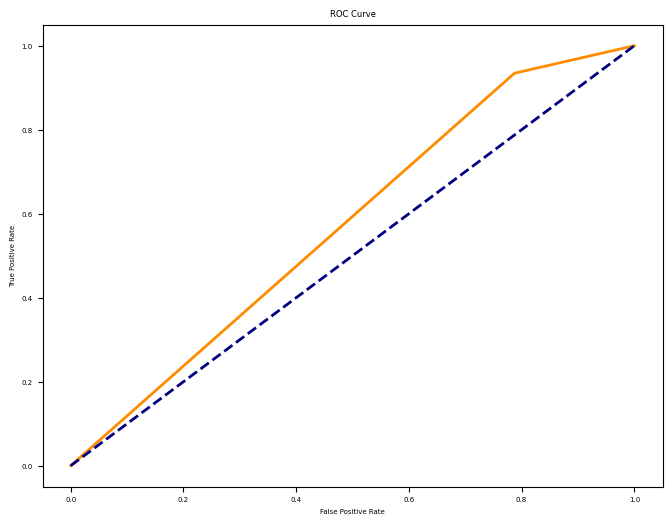

AUC Score: 0.5736012237027157


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score, auc, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

selected_columns = [
    'contains_bot_keyword',
    'description_length',
    'word_count',
    'first_char_uppercase_screen_name',
    'verified',
    'num_digits_screen_name'
]
df_subset = df[selected_columns]

X = df_subset
y = df['account_type']


naive_bayes_classifier = GaussianNB()

# Perform 5-fold cross-validation and display results
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_accuracy = cross_val_score(
    naive_bayes_classifier, X, y, cv=kf, scoring='accuracy')
cv_auc = cross_val_score(naive_bayes_classifier, X,
                         y, cv=kf, scoring='roc_auc')

print("\n5-Fold Cross-Validation Results:")
print("Cross-Validation Accuracy: {:.4f} )".format(np.mean(cv_accuracy)))
print("Cross-Validation AUC Score: {:.4f}".format(np.mean(cv_auc)))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=69)

naive_bayes_classifier.fit(X_train, y_train)

y_pred = naive_bayes_classifier.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)

# Encode categorical bot and human to numeric for ROC plotting
label_encoder = LabelEncoder()
y_test_numeric = label_encoder.fit_transform(y_test)
y_pred_numeric = label_encoder.transform(y_pred)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test_numeric, y_pred_numeric)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label='ROC curve (AUC = {:.2f})'.format(auc(fpr, tpr)))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
auc_score = roc_auc_score(y_test_numeric, y_pred_numeric)
print(f"AUC Score: {auc_score}")

The Naive Bayes algorithm achieved an overall accuracy of 69% on the dataset. It displayed strong performance in identifying humans (precision: 0.70, recall: 0.94) but struggled with bot detection, evidenced by a lower precision (0.62) and **significantly** lower recall (0.21). The classifier's difficulty in distinguishing bots led to a higher number of false negatives. The algorithm likely suffers from the fact that while certain bots are very identifiable through the bayes method with high probability, that only represents a small subset of bots to identify. The AUC score of 0.57 indicates a moderate ability for the Naive Bayes classifier to distinguish between positive and negative instances. While above random chance (0.5), the modest AUC score aligns with the challenges observed in the model's difficulty in accurately identifying instances of bots.

## Support Vector Machines (SVMs)

Lastly, let's try using SVMs. Support Vector Machines (SVM) are a set of supervised learning methods used for classification, regression, and outliers detection. They are effective in high-dimensional spaces, which is good - we have quite a few features.

### Feature Scaling and Transformation

Before applying SVM, it's crucial to scale and transform the features.

1. **Feature Selection**: We select relevant features for our model, including both numerical and categorical (Boolean) data.

2. **Boolean Feature Conversion**: Convert Boolean features to numerical format (True/False to 1/0) for consistency and ease of computation.

3. **Feature Scaling**: Apply standard scaling to numerical features to normalize their range. This ensures that all features contribute equally to the result.


In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

feature_columns = ['description_length','word_count', 'contains_bot_keyword', 'contains_hashtag',
                   'favourites_count', 'friends_count', 'followers_count', 'follower_friend_ratio',
                   'num_digits_screen_name', 'first_char_uppercase_screen_name',
                   'statuses_count', 'verified', 'average_tweets_per_day', 'account_age_days']
features = df[feature_columns]
labels = df['account_type']

# convert Boolean columns to integers (True to 1 and False to 0)
bool_cols = ['contains_bot_keyword', 'contains_hashtag', 'first_char_uppercase_screen_name', 'verified']
features[bool_cols] = features[bool_cols].astype(int)

# scale the numerical features
numerical_cols = ['description_length', 'word_count', 'favourites_count', 'friends_count', 'followers_count',
                  'follower_friend_ratio', 'num_digits_screen_name', 'statuses_count', 'average_tweets_per_day',
                  'account_age_days']

scaler = StandardScaler()
features[numerical_cols] = scaler.fit_transform(features[numerical_cols])


features.head()

<ipython-input-70-6c067575a175>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[bool_cols] = features[bool_cols].astype(int)
<ipython-input-70-6c067575a175>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[numerical_cols] = scaler.fit_transform(features[numerical_cols])


,description_length,word_count,contains_bot_keyword,contains_hashtag,favourites_count,friends_count,followers_count,follower_friend_ratio,num_digits_screen_name,first_char_uppercase_screen_name,statuses_count,verified,average_tweets_per_day,account_age_days
0,1.131377,0.964740,0,0,-0.362527,-0.089655,-0.149232,-0.025858,-0.484174,0,-0.149006,0,0.039802,-1.597274
1,1.701291,1.695412,0,0,-0.346844,-0.071974,-0.149527,-0.026439,-0.484174,1,-0.309249,0,-0.272934,-1.620950
2,0.248930,-0.009488,0,0,-0.265160,-0.077747,-0.149805,-0.026440,-0.484174,1,-0.298125,0,-0.245229,-1.837980
3,0.543079,-0.131267,0,0,-0.114054,-0.076960,-0.149665,-0.026439,0.227591,1,-0.293327,0,-0.244212,-1.512434
4,-0.578364,-0.374824,0,0,-0.360050,-0.087395,0.155160,-0.014621,-0.484174,1,-0.250582,1,-0.225904,0.114308


The `features` DataFrame is now preprocessed, with scaled numerical columns and encoded Boolean columns, making it suitable for training with an SVM model!

Now, it's actually time to build the model and find the best hyperparameters.

**Hyperparameter Tuning**: Using GridSearchCV, we perform an exhaustive search over specified parameter values for the SVM. This includes varying the regularization parameter (`C`), kernel types (`linear`, `rbf`), and kernel coefficients (`gamma`). The goal is to find the best combination of these parameters for our model.

This approach ensures that we not only find an SVM model that is well-suited to our data but also understand its performance characteristics in detail.

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import time

# split the data
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=66)

# SVM parameter grid:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svm_classifier = SVC()

# use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy')

# fit the model
start_time = time.time()
grid_search.fit(X_train, y_train)

# get best parameters and best SVM model
best_params = grid_search.best_params_
best_svm_model = grid_search.best_estimator_

# predict with best SVM model
y_pred = best_svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
end_time = time.time()

print(f'Best Hyperparameters: {best_params}')
print('Elapsed Time: ', end_time - start_time)
print(f'Accuracy with Best Hyperparameters: {accuracy:.2f}')

print("Classification Report:")
print(classification_report(y_test, y_pred))

Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Elapsed Time:  1929.0923471450806
Accuracy with Best Hyperparameters: 0.79
Classification Report:
              precision    recall  f1-score   support

         bot       0.66      0.72      0.69      2462
       human       0.86      0.82      0.84      5026

    accuracy                           0.79      7488
   macro avg       0.76      0.77      0.76      7488
weighted avg       0.79      0.79      0.79      7488



😵‍💫 That took 33 minutes...

Let's see what these results mean.

**Hyperparameters**: The model's best performance was achieved with a high regularization parameter C of `10`, using the `RBF` kernel, and the 'scale' option for `gamma`. This indicates a model that balances between maximizing the margin and minimizing the classification error.

**Overall Accuracy**: The model achieved an accuracy of `0.79`. This means that it correctly predicted the account type (bot or human) for 79% of the test dataset, which is a respectable figure.

**Classification Report Analysis:**

**Bot Class** (Precision 0.66, Recall 0.72): The model's precision indicates that out of all instances predicted as bots, 66% were actually bots. The recall score reflects that the model successfully identified 72% of all actual bot instances in the test set. The F1-score of 0.69 suggests a balanced performance between precision and recall for this class.

**Human Class** (Precision 0.86, Recall 0.82): For the human class, the precision suggests that the model was correct in its prediction 86% of the time, while the recall indicates it identified 82% of actual humans. The F1-score of 0.84 for this class is relatively higher, showing a better performance for human class identification.

In [ ]:
# This code skips the time-consuming GridSearchCV process. We already found
# the best hyperparameters. ('C': 10, 'gamma': 'scale', 'kernel': 'rbf')
# Let's simply build the same model again without the 33 minute build time this time.
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import time

# split the data
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=66)

# initialize the SVM classifier with best hyperparameters (from above)
svm_model = SVC(C=10, gamma='scale', kernel='rbf')
# probability=True

# fit the model
start_time = time.time()
svm_model.fit(X_train, y_train)

# predict
y_pred = svm_model.predict(X_test)

# print accuracy, classification report
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

end_time = time.time()
print('Elapsed Time: ', end_time - start_time)

Accuracy:  0.7883279914529915
Classification Report:
               precision    recall  f1-score   support

         bot       0.66      0.72      0.69      2462
       human       0.86      0.82      0.84      5026

    accuracy                           0.79      7488
   macro avg       0.76      0.77      0.76      7488
weighted avg       0.79      0.79      0.79      7488

Confusion Matrix:
 [[1771  691]
 [ 894 4132]]
Elapsed Time:  45.27185368537903


The accuracy is the same at `0.79`.
The training and hyperparmeter tuning process took about 33 minutes, which is a considerable amount of time. Fine-tuning an SVM model with GridSerachCV on a moderately large dataset is computationality complex. As a result, we won't be experimenting with a wider or more fine-grained range of hyperparameters in GridSearchCV, since this will increase computational time.

We can however, compare the SVM with other models we have developed to see which performs best. Even better, an ensemble of models can yield better results.

### Ensembling

- The KNN model's accuracy was `.87`.
- The decision tree model's accuracy was `.82`.
- The naive Bayes's accuracy was `.69`.
- And the SVM's accuracy was `.79`.

Regarding building an ensemble model with the models we have (`best_knn_model, naive_bayes_classifier, svm_model, best_decision_tree_model`), one common approach is to use a Voting Classifier. This ensemble method combines the predictions from different models and predicts the final output based on the majority voting of these models.

The VotingClassifier uses `hard` voting, which means the predicted class label for each sample is the class label that represents the majority (mode) of the class labels predicted by each individual classifier.

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report

ensemble_model = VotingClassifier(estimators=[
    ('knn', best_knn_model),
    ('naive_bayes', naive_bayes_classifier),
    ('svm', svm_model),
    ('decision_tree', best_decision_tree_model)
], voting='hard')

start_time = time.time()
ensemble_model.fit(X_train, y_train)
y_pred_ensemble = ensemble_model.predict(X_test)

ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)
print("Ensemble Model Accuracy: ", ensemble_accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred_ensemble))

end_time = time.time()
print('Elapsed Time: ', end_time - start_time)

Ensemble Model Accuracy:  0.7843215811965812
Classification Report:
               precision    recall  f1-score   support

         bot       0.63      0.84      0.72      2462
       human       0.91      0.76      0.82      5026

    accuracy                           0.78      7488
   macro avg       0.77      0.80      0.77      7488
weighted avg       0.82      0.78      0.79      7488

Elapsed Time:  47.73738145828247


We tried ensembling all four of the models that we trained. While the accuracy was fairly strong at 78%, the KNN model still had the best accuracy. We believe this could have happened for 2 reasons. For one, our models weren't very diverse and were making the same class of mistakes, which would mean our overall accuracy would not be much improved. Secondly, our voting strategy could have impacted our results as we used equal vote weighted as opposed to weighted voting since we chose to include KNN in our ensemble (which doesn't have an associated probability).

Our ensemble approach highlights the importance of model diversity and the impact of weighting strategies in voting classifiers.

## **Conclusion**

<img src="https://www.financemagnates.com/wp-content/uploads/2016/05/robot_man.jpg" width="450" height="auto">

We successfully navigated through various stages of machine learning: preprocessing our data, employing feature engineering to extract meaningful insights, and implementing different machine learning models including KNN, SVM, and decision trees. Each model provided us with unique perspectives and performance metrics in identifying bots. Each one was significantly better than guessing at random!

This project underscores the potential of machine learning in maintaining the integrity of social media platforms. By accurately identifying bots, platforms can take steps to ensure that user interactions remain authentic and informative.

Over the course of this project, we embarked on an important journey to distinguish between bot and human accounts on X (formerly known as Twitter). By continuing to refine these models and techniques, we can contribute to a healthier social media landscape by identifying patterns that differentiate bots from genuine human users. Thanks for reading!

<img src="https://www.easel.ly/blog/wp-content/uploads/2018/11/seo-bot-vs-human-1024x683.jpg" width="300" height="auto">